In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df_2023 = pd.read_csv('/home/dominick/Documents/development/python_projects/starting_data_science/urban_canvas/data/ACSDT5Y2023.B19013-Data.csv')
df_2019 = pd.read_csv('/home/dominick/Documents/development/python_projects/starting_data_science/urban_canvas/data/ACSDT5Y2019.B19013-Data.csv')
df_2011 = pd.read_csv('/home/dominick/Documents/development/python_projects/starting_data_science/urban_canvas/data/ACSDT5Y2011.B19013-Data.csv')

In [3]:
# Select only the columns you need 
df_2019_clean = df_2019[['GEO_ID', 'B19013_001E']].copy()

# The GEO_ID has extra characters at the beginning. 
# This slices the string to get just the standard ID.
df_2019_clean['GEOID'] = df_2019_clean['GEO_ID'].str.slice(start=9)

# Rename the columns to something simple
df_2019_clean.rename(columns={'B19013_001E': 'income_2019'}, inplace=True)

# Drop the old GEO_ID column
df_2019_clean = df_2019_clean[['GEOID', 'income_2019']]

# Display the first few rows of your new, clean data
print(df_2019_clean.head())

         GEOID                                        income_2019
0               Estimate!!Median household income in the past ...
1           36                                              68486
2        36047                                              60231
3  36047000100                                              96250
4  36047000200                                              56080


In [4]:
# Select only the columns you need
df_2011_clean = df_2011[['GEO_ID', 'B19013_001E']].copy()

# The GEO_ID has extra characters at the beginning. 
# This slices the string to get just the standard ID.
df_2011_clean['GEOID'] = df_2011_clean['GEO_ID'].str.slice(start=9)

# Rename the columns to something simple
df_2011_clean.rename(columns={'B19013_001E': 'income_2011'}, inplace=True)

# Drop the old GEO_ID column
df_2011_clean = df_2011_clean[['GEOID', 'income_2011']]

# Display the first few rows of your new, clean data
print(df_2011_clean.head())

         GEOID                                        income_2011
0               Estimate!!Median household income in the past ...
1           36                                              56951
2        36047                                              44593
3  36047000100                                              87806
4  36047000200                                              31728


In [5]:
# Select only the columns you need
df_2023_clean = df_2023[['GEO_ID', 'B19013_001E']].copy()

# The GEO_ID has extra characters at the beginning. 
# This slices the string to get just the standard ID.
df_2023_clean['GEOID'] = df_2023_clean['GEO_ID'].str.slice(start=9)

# Rename the columns to something simple
df_2023_clean.rename(columns={'B19013_001E': 'income_2023'}, inplace=True)

# Drop the old GEO_ID column
df_2023_clean = df_2023_clean[['GEOID', 'income_2023']]

# Display the first few rows of your new, clean data
print(df_2023_clean.head())

         GEOID                                        income_2023
0               Estimate!!Median household income in the past ...
1           36                                              84578
2        36047                                              78548
3  36047000100                                             167778
4  36047000200                                              81154


In [6]:
# # --- 1. Clean Each DataFrame ---

# # Clean 2011 Data (VERIFY original column names)
# df_2011_clean = df_2011[['GEO.id2', 'HD01_VD01']].copy()
# df_2011_clean.rename(columns={'GEO.id2': 'GEOID', 'HD01_VD01': 'income_2011'}, inplace=True)

# # Clean 2019 Data (VERIFY original column names)
# df_2019_clean = df_2019[['GEO_ID', 'B19013_001E']].copy()
# df_2019_clean['GEOID'] = df_2019_clean['GEO_ID'].str.slice(start=9)
# df_2019_clean.rename(columns={'B19013_001E': 'income_2019'}, inplace=True)
# df_2019_clean = df_2019_clean[['GEOID', 'income_2019']]

# # Clean 2023 Data (VERIFY original column names)
# df_2023_clean = df_2023[['GEO_ID', 'B19013_001E']].copy()
# df_2023_clean['GEOID'] = df_2023_clean['GEO_ID'].str.slice(start=9)
# df_2023_clean.rename(columns={'B19013_001E': 'income_2023'}, inplace=True)
# df_2023_clean = df_2023_clean[['GEOID', 'income_2023']]


# --- 2. Merge the Cleaned DataFrames ---

# Merge the first two
df_merged = pd.merge(df_2011_clean, df_2019_clean, on='GEOID', how='outer')

# Merge the result with the third
df_final = pd.merge(df_merged, df_2023_clean, on='GEOID', how='outer')

# --- 3. Inspect the Result ---
print("Merge complete! Here are the first 5 rows:")
print(df_final.head())

print("\nAnd here's some info about the new DataFrame:")
df_final.info()

Merge complete! Here are the first 5 rows:
         GEOID                                        income_2011  \
0               Estimate!!Median household income in the past ...   
1           36                                              56951   
2        36047                                              44593   
3  36047000100                                              87806   
4  36047000200                                              31728   

                                         income_2019  \
0  Estimate!!Median household income in the past ...   
1                                              68486   
2                                              60231   
3                                              96250   
4                                              56080   

                                         income_2023  
0  Estimate!!Median household income in the past ...  
1                                              84578  
2                                       

In [7]:
df_final

,GEOID,income_2011,income_2019,income_2023
0,,Estimate!!Median household income in the past ...,Estimate!!Median household income in the past ...,Estimate!!Median household income in the past ...
1,36,56951,68486,84578
2,36047,44593,60231,78548
3,36047000100,87806,96250,167778
4,36047000200,31728,56080,81154
...,...,...,...,...
842,36047122000,41645,39674,70268
843,36047123700,28652,47798,52649
844,36047150200,88711,117639,126364
845,36047152200,78125,135982,214297


In [8]:
# Load the geospatial data (the map of census tracts)
# Make sure the path to your shapefile is correct.
gdf = gpd.read_file('/home/dominick/Documents/development/python_projects/starting_data_science/urban_canvas/data/cb_2024_36_tract_500k.shp')
# Load your census CSV data
gdf_map = gdf
#Filter the map to include only Kings County (Brooklyn)
# The FIPS code for Kings County is '047'
gdf_brooklyn = gdf_map[gdf_map['COUNTYFP'] == '047']
gdf_brooklyn

,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
53,36,047,005000,1400000US36047005000,36047005000,50,Census Tract 50,NY,Kings County,New York,CT,223992,535603,"POLYGON ((-74.04166 40.62601, -74.03911 40.625..."
54,36,047,005202,1400000US36047005202,36047005202,52.02,Census Tract 52.02,NY,Kings County,New York,CT,133272,440002,"POLYGON ((-74.04096 40.6207, -74.04048 40.6207..."
55,36,047,006000,1400000US36047006000,36047006000,60,Census Tract 60,NY,Kings County,New York,CT,152260,0,"POLYGON ((-74.0346 40.622, -74.03432 40.62268,..."
56,36,047,016900,1400000US36047016900,36047016900,169,Census Tract 169,NY,Kings County,New York,CT,209462,0,"POLYGON ((-73.98448 40.6596, -73.98392 40.6601..."
57,36,047,022600,1400000US36047022600,36047022600,226,Census Tract 226,NY,Kings County,New York,CT,156181,0,"POLYGON ((-73.98906 40.64412, -73.98835 40.644..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,36,047,031701,1400000US36047031701,36047031701,317.01,Census Tract 317.01,NY,Kings County,New York,CT,139741,0,"POLYGON ((-73.95294 40.67357, -73.95285 40.674..."
5363,36,047,046400,1400000US36047046400,36047046400,464,Census Tract 464,NY,Kings County,New York,CT,164016,0,"POLYGON ((-73.9804 40.62521, -73.97982 40.6257..."
5365,36,047,050202,1400000US36047050202,36047050202,502.02,Census Tract 502.02,NY,Kings County,New York,CT,135737,0,"POLYGON ((-73.97804 40.65475, -73.97657 40.655..."
5366,36,047,092800,1400000US36047092800,36047092800,928,Census Tract 928,NY,Kings County,New York,CT,157219,0,"POLYGON ((-73.91374 40.65417, -73.91233 40.654..."


In [9]:
# The tract ID in the shapefile is likely named 'TRACTCE'. Let's rename it to 'GEOID'.
gdf_brooklyn.drop(columns=['TRACTCE'], inplace=True)


/tmp/ipykernel_8146/2198978282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_brooklyn.drop(columns=['TRACTCE'], inplace=True)


In [10]:
# Merge the geodataframe (map) with your final income dataframe
merged_gdf = gdf_brooklyn.merge(df_final, on='GEOID', how='left')
merged_gdf

,STATEFP,COUNTYFP,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,income_2011,income_2019,income_2023
0,36,047,1400000US36047005000,36047005000,50,Census Tract 50,NY,Kings County,New York,CT,223992,535603,"POLYGON ((-74.04166 40.62601, -74.03911 40.625...",74271,131042,124167
1,36,047,1400000US36047005202,36047005202,52.02,Census Tract 52.02,NY,Kings County,New York,CT,133272,440002,"POLYGON ((-74.04096 40.6207, -74.04048 40.6207...",59625,77240,106087
2,36,047,1400000US36047006000,36047006000,60,Census Tract 60,NY,Kings County,New York,CT,152260,0,"POLYGON ((-74.0346 40.622, -74.03432 40.62268,...",62723,100324,74107
3,36,047,1400000US36047016900,36047016900,169,Census Tract 169,NY,Kings County,New York,CT,209462,0,"POLYGON ((-73.98448 40.6596, -73.98392 40.6601...",66603,117256,154155
4,36,047,1400000US36047022600,36047022600,226,Census Tract 226,NY,Kings County,New York,CT,156181,0,"POLYGON ((-73.98906 40.64412, -73.98835 40.644...",57778,46611,84194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,36,047,1400000US36047031701,36047031701,317.01,Census Tract 317.01,NY,Kings County,New York,CT,139741,0,"POLYGON ((-73.95294 40.67357, -73.95285 40.674...",35243,78750,94335
800,36,047,1400000US36047046400,36047046400,464,Census Tract 464,NY,Kings County,New York,CT,164016,0,"POLYGON ((-73.9804 40.62521, -73.97982 40.6257...",42353,57283,68315
801,36,047,1400000US36047050202,36047050202,502.02,Census Tract 502.02,NY,Kings County,New York,CT,135737,0,"POLYGON ((-73.97804 40.65475, -73.97657 40.655...",78380,102656,96310
802,36,047,1400000US36047092800,36047092800,928,Census Tract 928,NY,Kings County,New York,CT,157219,0,"POLYGON ((-73.91374 40.65417, -73.91233 40.654...",65775,58171,86313


ValueError: Unknown format code 'f' for object of type 'str'

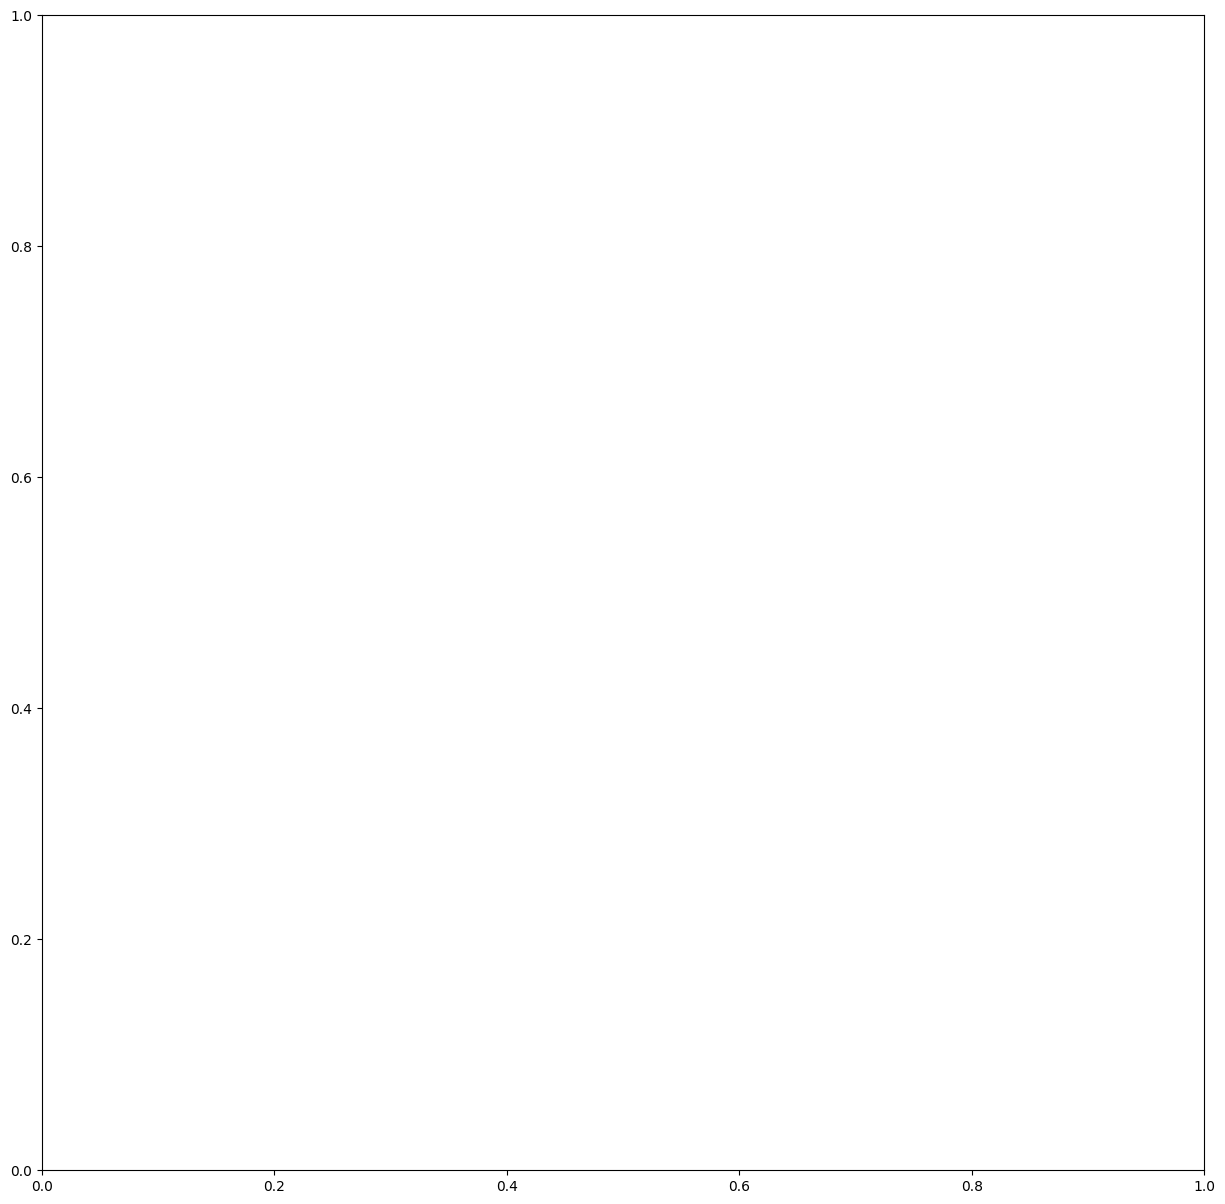

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Check for and handle missing values
income_data = merged_gdf['income_2023'].dropna()  # Remove NaN values

# Add error handling for the print statements
if len(income_data) > 0:
    print(f"Income data range: ${income_data.min():,.0f} to ${income_data.max():,.0f}")
    print(f"Number of valid income records: {len(income_data)} out of {len(merged_gdf)}")
else:
    print("Warning: No valid income data found!")
    print(f"Total records in dataset: {len(merged_gdf)}")

# Plot the merged data WITHOUT the automatic legend
merged_gdf.plot(column='income_2023',
                ax=ax,
                legend=False,  # Turn off the automatic legend
                cmap='viridis')

# Add a proper colorbar with custom tick labels using valid data only
if len(income_data) > 0:
    sm = plt.cm.ScalarMappable(cmap='viridis', 
                               norm=plt.Normalize(vmin=income_data.min(), 
                                                vmax=income_data.max()))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, shrink=0.6)

    # Set custom tick locations and labels for cleaner ranges
    min_income = income_data.min()
    max_income = income_data.max()
    tick_values = np.linspace(min_income, max_income, 6)  # 6 evenly spaced values
    tick_labels = [f'${int(val/1000)}K' for val in tick_values]  # Format as $XXK

    cbar.set_ticks(tick_values)
    cbar.set_ticklabels(tick_labels)
    cbar.set_label('Median Household Income', rotation=270, labelpad=20)

# Add a title and turn off the axis
plt.title("Median Household Income in Brooklyn (2023)", fontsize=16)
ax.set_axis_off()

# Show the map
plt.show()